In [1]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# 1. Read and split dataset


## Read

In [2]:
df = pd.read_csv('../clean_data/clean_google.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df['Close+1'] = df['Close'].shift(-1)
df[['Close', 'Close+1']].tail(2)
df = df.drop(columns=[ 'tema_2', 'tema_100'])
df.dropna()


,Open,High,Low,Close,Volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBL_3_2.0,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_8,Close+1
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-10 00:00:00-05:00,4.867367,4.957457,4.800551,4.881381,301282416,3.297238,58.767641,42.870467,100.000000,0.800973,...,4.675485,4.816983,4.958482,5.874972,0.727556,4.697698,4.957457,4.879004,4.850060,4.843343
2005-01-11 00:00:00-05:00,4.895395,4.947698,4.834334,4.843343,278069652,2.831877,48.714336,37.850269,44.635922,2.646507,...,4.825786,4.858608,4.891431,1.351113,0.267455,4.724224,4.957457,4.891016,4.842952,4.889389
2005-01-12 00:00:00-05:00,4.863113,4.903153,4.767267,4.889389,326784888,2.792202,60.869291,34.702612,-100.000000,0.789267,...,4.831197,4.871371,4.911544,1.649371,0.724253,4.767267,4.957457,4.835210,4.862860,4.888138
2005-01-13 00:00:00-05:00,4.889389,4.939690,4.856106,4.888138,273702024,2.251429,60.286905,24.983021,96.306268,0.138419,...,4.830788,4.873623,4.916458,1.757837,0.669424,4.767267,4.947698,4.897898,4.874027,5.004254
2005-01-14 00:00:00-05:00,4.904905,5.005255,4.858108,5.004254,385226388,2.569815,82.969438,31.594403,100.000000,3.322315,...,4.818370,4.927260,5.036150,4.419909,0.853538,4.767267,5.005255,4.931682,4.941813,5.102603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-29 00:00:00-04:00,119.239998,120.059998,118.300003,119.099998,24090900,2.208150,37.185949,55.252253,50.763377,0.642219,...,117.685763,119.203334,120.720904,2.546187,0.465954,116.099998,120.389999,119.180000,118.685920,119.699997
2023-06-30 00:00:00-04:00,120.169998,121.080002,119.690002,119.699997,29519700,1.925610,47.880285,38.544280,100.000000,1.157775,...,118.776368,119.659999,120.543629,1.476902,0.522633,116.849998,121.080002,120.385002,118.896210,119.900002
2023-07-03 00:00:00-04:00,119.239998,120.190002,118.820000,119.900002,14467900,1.532510,51.969111,34.240526,-2.406849,-0.232983,...,118.886795,119.566666,120.246537,1.137225,0.745146,118.300003,121.080002,119.505001,119.192271,121.750000


## SPLIT DATASET 

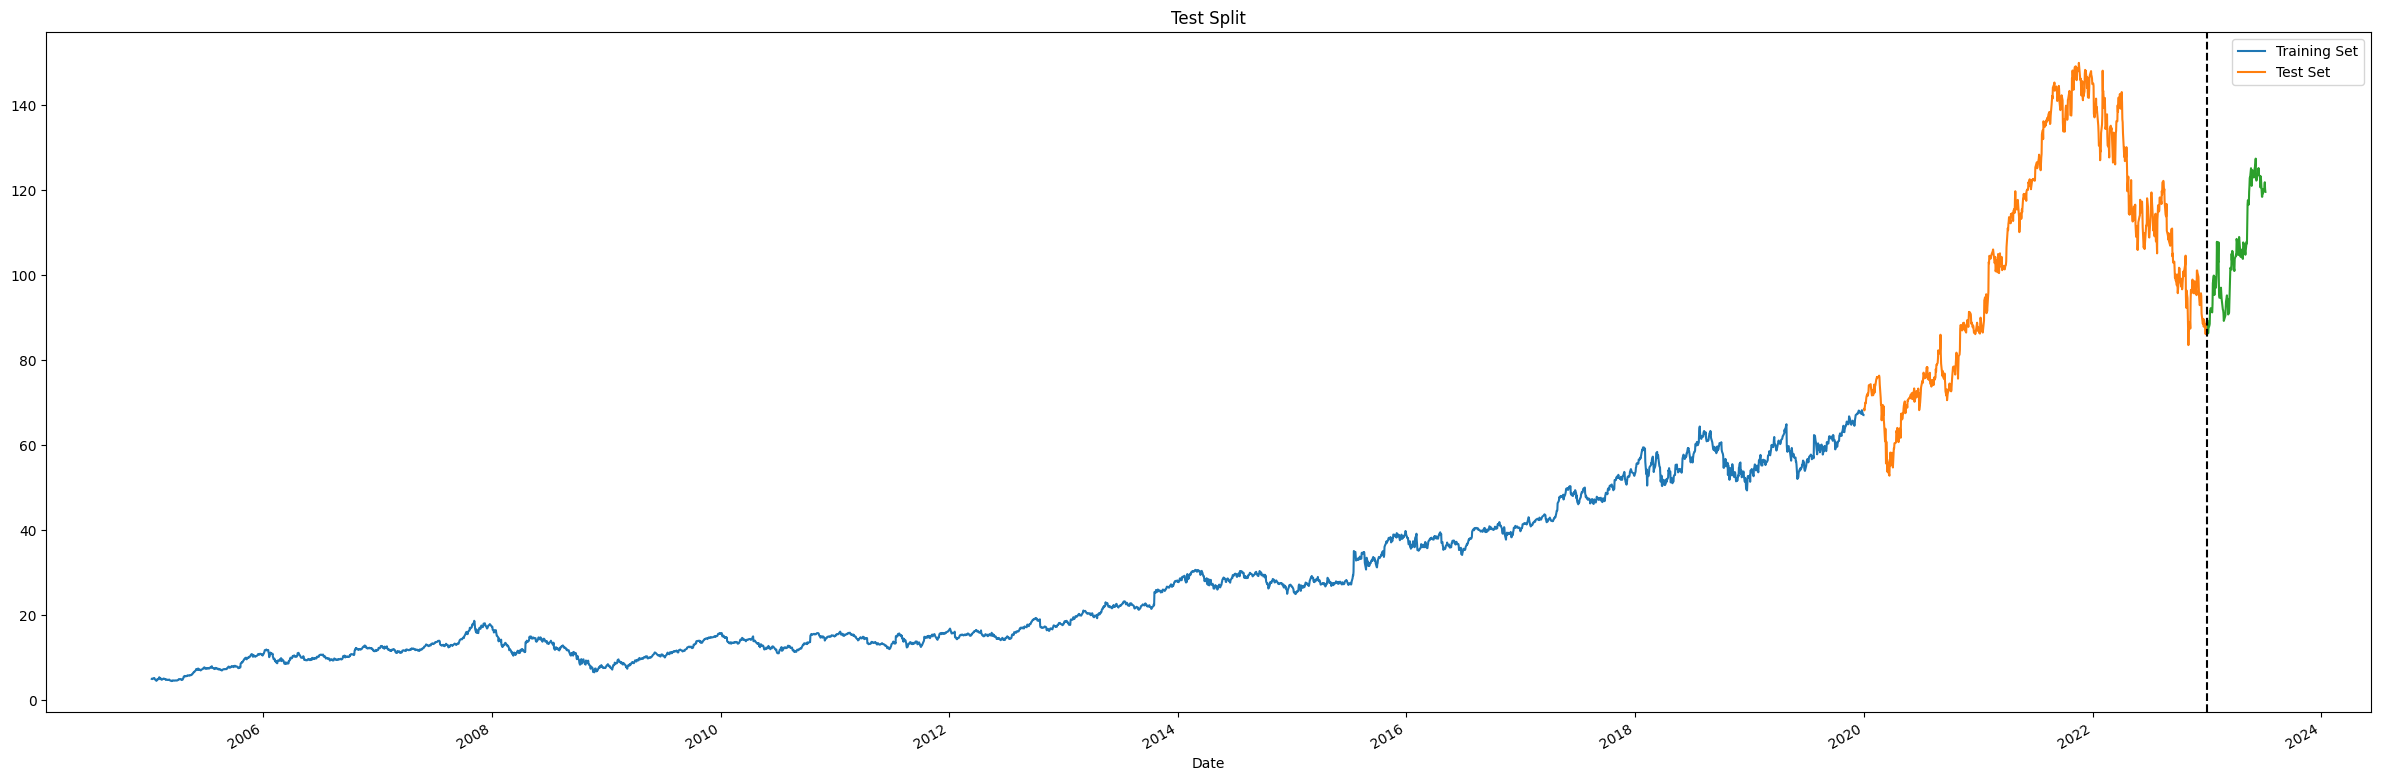

In [3]:
train = df.loc[(df.index < pd.to_datetime('2020-01-01 00:00:00-04:00'))]
test = df.loc[(df.index >= pd.to_datetime('2020-01-01 00:00:00-04:00')) & (df.index < pd.to_datetime('2023-01-01 00:00:00-04:00'))]
test_last = df.loc[df.index >=  pd.to_datetime('2023-01-01 00:00:00-04:00')]

fig, ax = plt.subplots(figsize=(30, 10))
train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='test Set', title='Test Split')

test_last['Close'].plot(ax=ax, label='val Set')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
# plt.show()

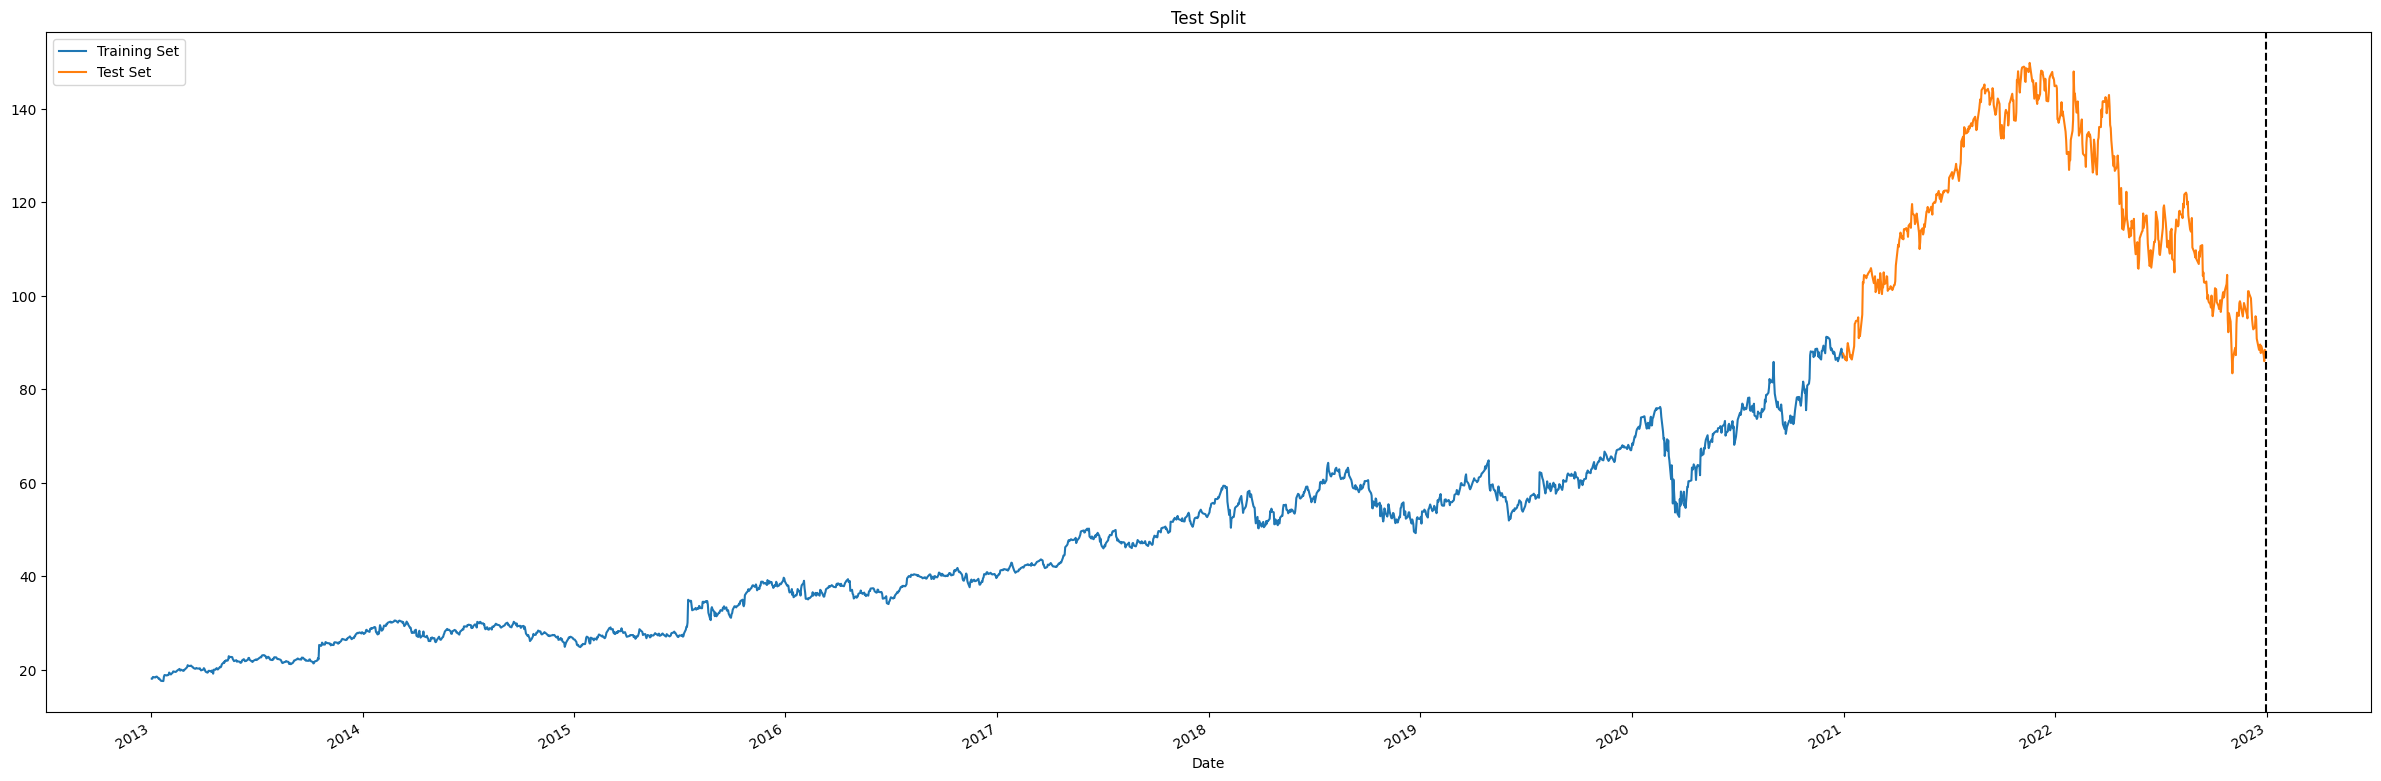

In [4]:
temp_df = df.loc[ pd.to_datetime('2013-01-01 00:00:00-04:00'): pd.to_datetime('2022-12-31 00:00:00-04:00')]
# pd.to_datetime('2023-01-01 00:00:00-04:00')
train_size = int(len(temp_df) * 0.80)
test_size = int(len(temp_df) - train_size)

train = temp_df[:train_size]
test= temp_df[train_size:]

fig, ax = plt.subplots(figsize=(30, 10))

train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='test Set', title='Test Split')

ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## cross val

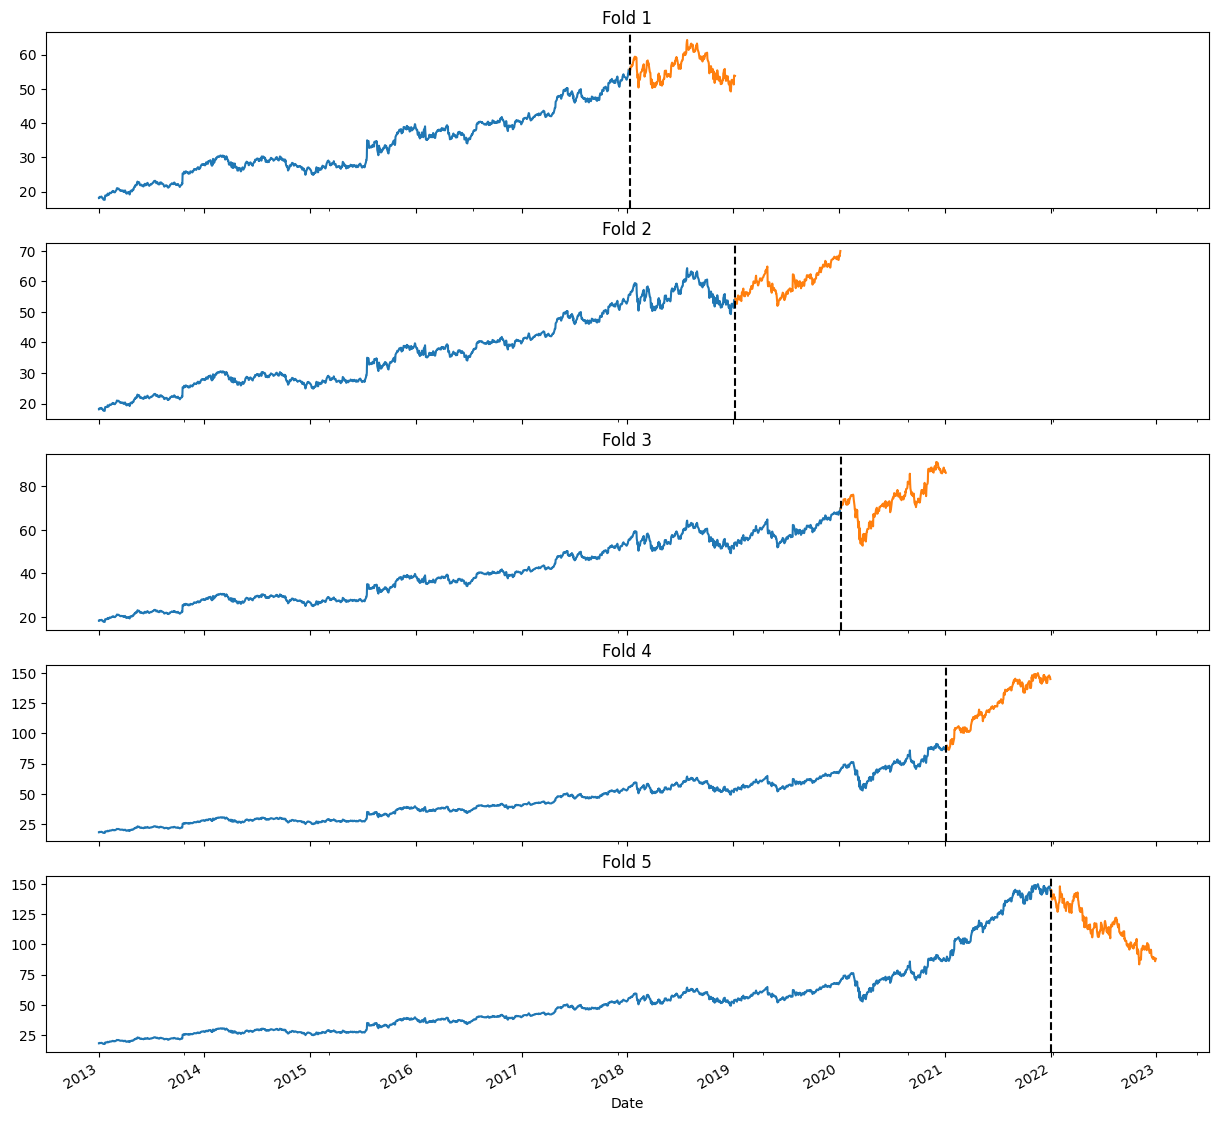

In [5]:
train = temp_df[:train_size]
test= temp_df[train_size:]

from sklearn.model_selection import TimeSeriesSplit



test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(temp_df.shape[0] * test_size_ratio)


tscv = TimeSeriesSplit(n_splits=5, test_size=test_size, gap=0)


fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)
fold = 0

for train_idx, val_idx in tscv.split(temp_df.copy()):
    train = temp_df.iloc[train_idx]
    test= temp_df.iloc[val_idx]

    train["Close"].plot(ax=axs[fold], label='Training Set', title='Fold {}'.format(fold+1))
    test["Close"].plot(ax=axs[fold], label='Val Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold+= 1
plt.show()

# Model

## test raw performance


In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
np.random.seed(42)

In [7]:
X_train = train.copy().drop(columns=['Close+1'])
Y_train = train[['Close+1']]
X_test = test.copy().drop(columns=['Close+1'])
Y_test = test[['Close+1']]

In [8]:
svr = SVR()
svr.fit(X_train,Y_train)
Y_pred =  svr.predict(X_test)
mse = (mean_squared_error(Y_test, Y_pred))
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse,rmse}")

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: (3006.084811883028, 54.82777409199673)


## scale

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X = temp_df.copy().drop(columns=['Close+1'])
X_scaled = scaler.fit_transform(X)

y = temp_df[['Close+1']]

## fine tune

In [10]:
import warnings
from sklearn.exceptions import ConvergenceWarning,DataConversionWarning

# Filter out DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Filter out ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [11]:
from sklearn.model_selection import  GridSearchCV

# param_grid = {
#     'C': [0.1],
#     'epsilon': [0.1],
#     'kernel': ['linear']
# }
param_grid={
    'C':[0.0001,0.001,0.01,0.1,1,10, 100], 
    'kernel': ['linear','rbf','poly'],
    'max_iter': [1000],
    'gamma':[0.0001,0.001,0.01,0.1,1,10, 100], 
    'degree':[1,2,3,4,5],
     'max_iter': [1000]
}



# Define the number of splits for time series cross-validation
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)

# Create the SVR model
svr = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid_search.fit(X_scaled, y)

# Print the best parameter combination and the corresponding mean squared error
print("Best Parameters: ", grid_search.best_params_)
print("Best Mean Squared Error: ", (-grid_search.best_score_))

Best Parameters:  {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear', 'max_iter': 1000}
Best Mean Squared Error:  2.0097690220493787


In [12]:
scores = grid_search.cv_results_
mean_scores = scores['mean_test_score']
params = scores['params']

# Sort the scores and parameters based on the mean scores in descending order
sorted_indices = np.argsort(mean_scores)[::-1]
sorted_mean_scores = mean_scores[sorted_indices]
sorted_params = [params[i] for i in sorted_indices]


# Print the sorted mean scores and corresponding parameters
for mean_score, param in zip(sorted_mean_scores, sorted_params):
    print(mean_score, '----', param)
    # if param['kernel'] == 'linear' and param['C'] == 1.0 and param['gamma'] == 0.001:
      
    #     print(mean_score, '----', param)


-2.0097690220493787 ---- {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'linear', 'max_iter': 1000}
-2.0097690220493787 ---- {'C': 1, 'degree': 4, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 1000}
-2.0097690220493787 ---- {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': 1000}
-2.0097690220493787 ---- {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 1000}
-2.0097690220493787 ---- {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': 1000}
-2.0097690220493787 ---- {'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 1000}
-2.0097690220493787 ---- {'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': 1000}
-2.0097690220493787 ---- {'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': 1000}
-2.0097690220493787 ---- {'C': 1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear', 'max_iter': 1000}
-2.0097690220493787 ---- {'C': 1, 'degree': 3, 'gamma': 10, 'kernel': 'linear', 'max_iter': 1000}

25.31154962947675
0.1719716779363556
0.38223023818913027
0.5166904214248211
0.34149136791788337
1.3411683639812464
1.1628890337837836
3.2420535026147324
10.564768106781123
8.56901280924558


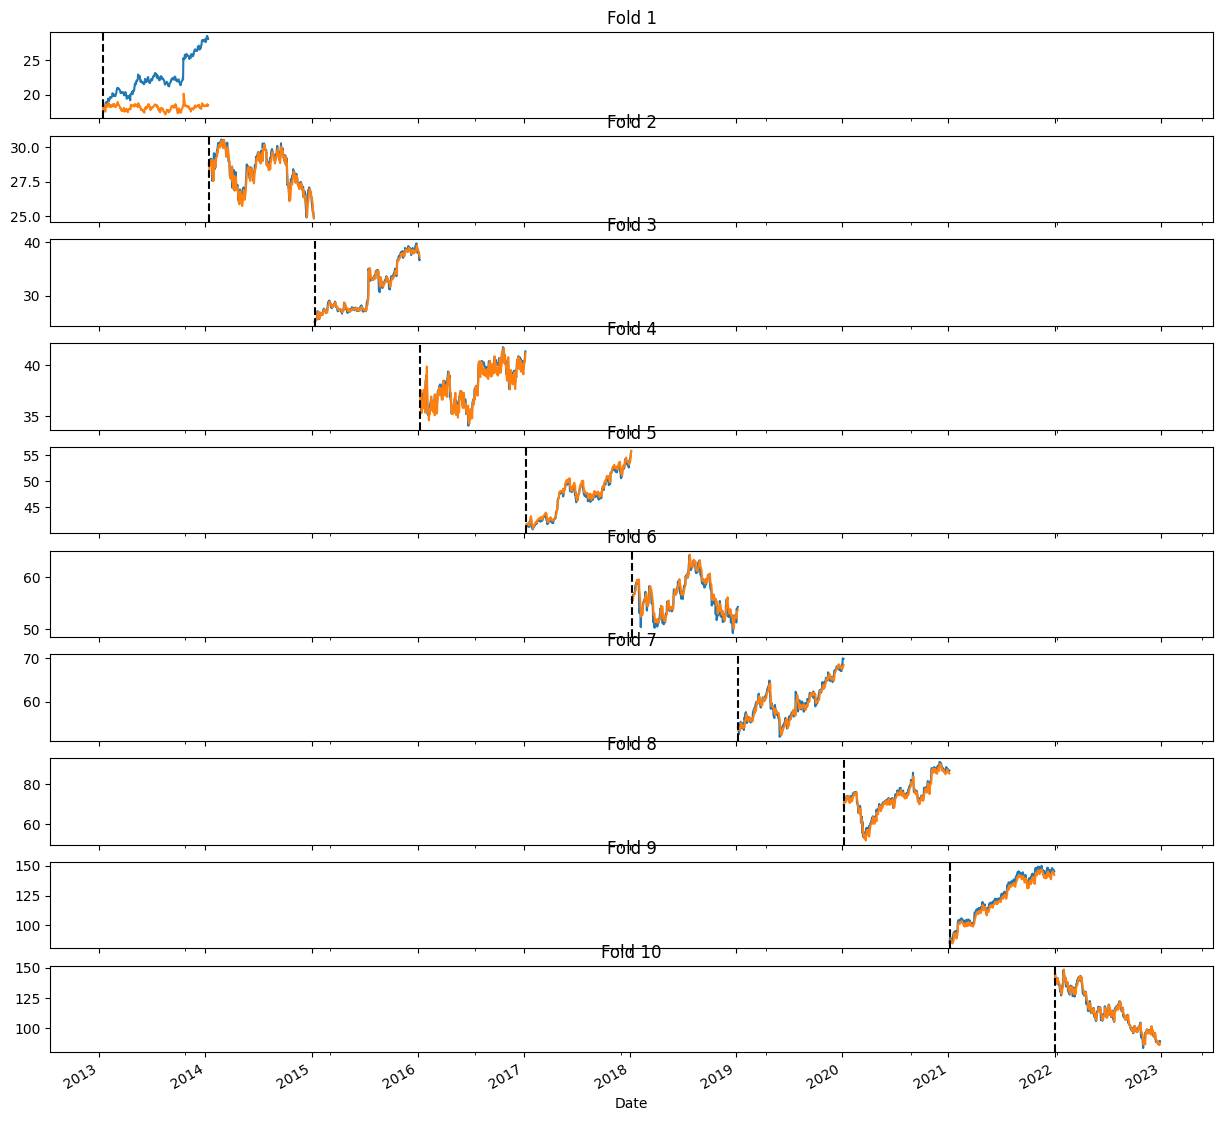

51.60382515135141


In [18]:
train = temp_df[:train_size]
test= temp_df[train_size:]

from sklearn.model_selection import TimeSeriesSplit



test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(temp_df.shape[0] * test_size_ratio)


tscv = TimeSeriesSplit(n_splits=10, test_size=test_size, gap=0)


fig, axs = plt.subplots(10, 1, figsize=(15, 15), sharex=True)
fold = 0

mean_val = 0
for train_idx, val_idx in tscv.split(temp_df.copy()):

    svr =SVR(C=1, degree= 1, kernel='linear', gamma= 0.01, max_iter= 1000)
    #'C': 0.1, 'degree': 1, 'gamma': 10, 'kernel': 'poly', 'max_iter': 1000

    train = temp_df.iloc[train_idx]
    test= temp_df.iloc[val_idx]
    X_train = train.copy().drop(columns=['Close+1'])

    scaler_cv = StandardScaler()
    scaler_cv.fit(X_train)
    x_train_scaled = scaler.transform(X_train)
    y_train = train[['Close+1']]
    X_test = test.copy().drop(columns=['Close+1'])
    X_test_scaled = scaler.transform(X_test)

    y_test = test[['Close+1']]
    
    svr.fit(x_train_scaled, y_train)

    y_pred = svr.predict(X_test_scaled)

    result = test.copy()
    result['pred'] = y_pred
    
    result["Close+1"].plot(ax=axs[fold], label='Training Set', title='Fold {}'.format(fold+1))
    result["pred"].plot(ax=axs[fold], label='Val Set')
    print(mean_squared_error(y_pred, y_test))
    mean_val+= mean_squared_error(y_pred, y_test)
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold+= 1
plt.show()
print(mean_val)

In [22]:
test_last = test_last.dropna()

svr =SVR(C=1, kernel= 'linear', max_iter= 5000)
X_train = temp_df.copy().drop(columns=['Close+1'])
y_train = temp_df[['Close+1']]
#scale train
final_scaler = StandardScaler()
final_scaler.fit(X_train)
X_train_scaled = final_scaler.transform(X_train)
#scale test
X_test_last = test_last.copy().drop(columns=['Close+1'])
y_test_last = test_last[['Close+1']]

X_test_last_scale = final_scaler.transform(X_test_last)

svr.fit(X_train_scaled,y_train)
y_pred = svr.predict(X_test_last_scale)


df_plot = y_test_last.copy()
df_plot['pred'] = y_pred




In [23]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test_last))
mape = np.abs((df_plot['pred']-df_plot['Close+1'])/df_plot['Close+1'])
mape = (mape.mean())
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 2.2479512957186003
MAPE: 0.016397890996198806


<Axes: xlabel='Date'>

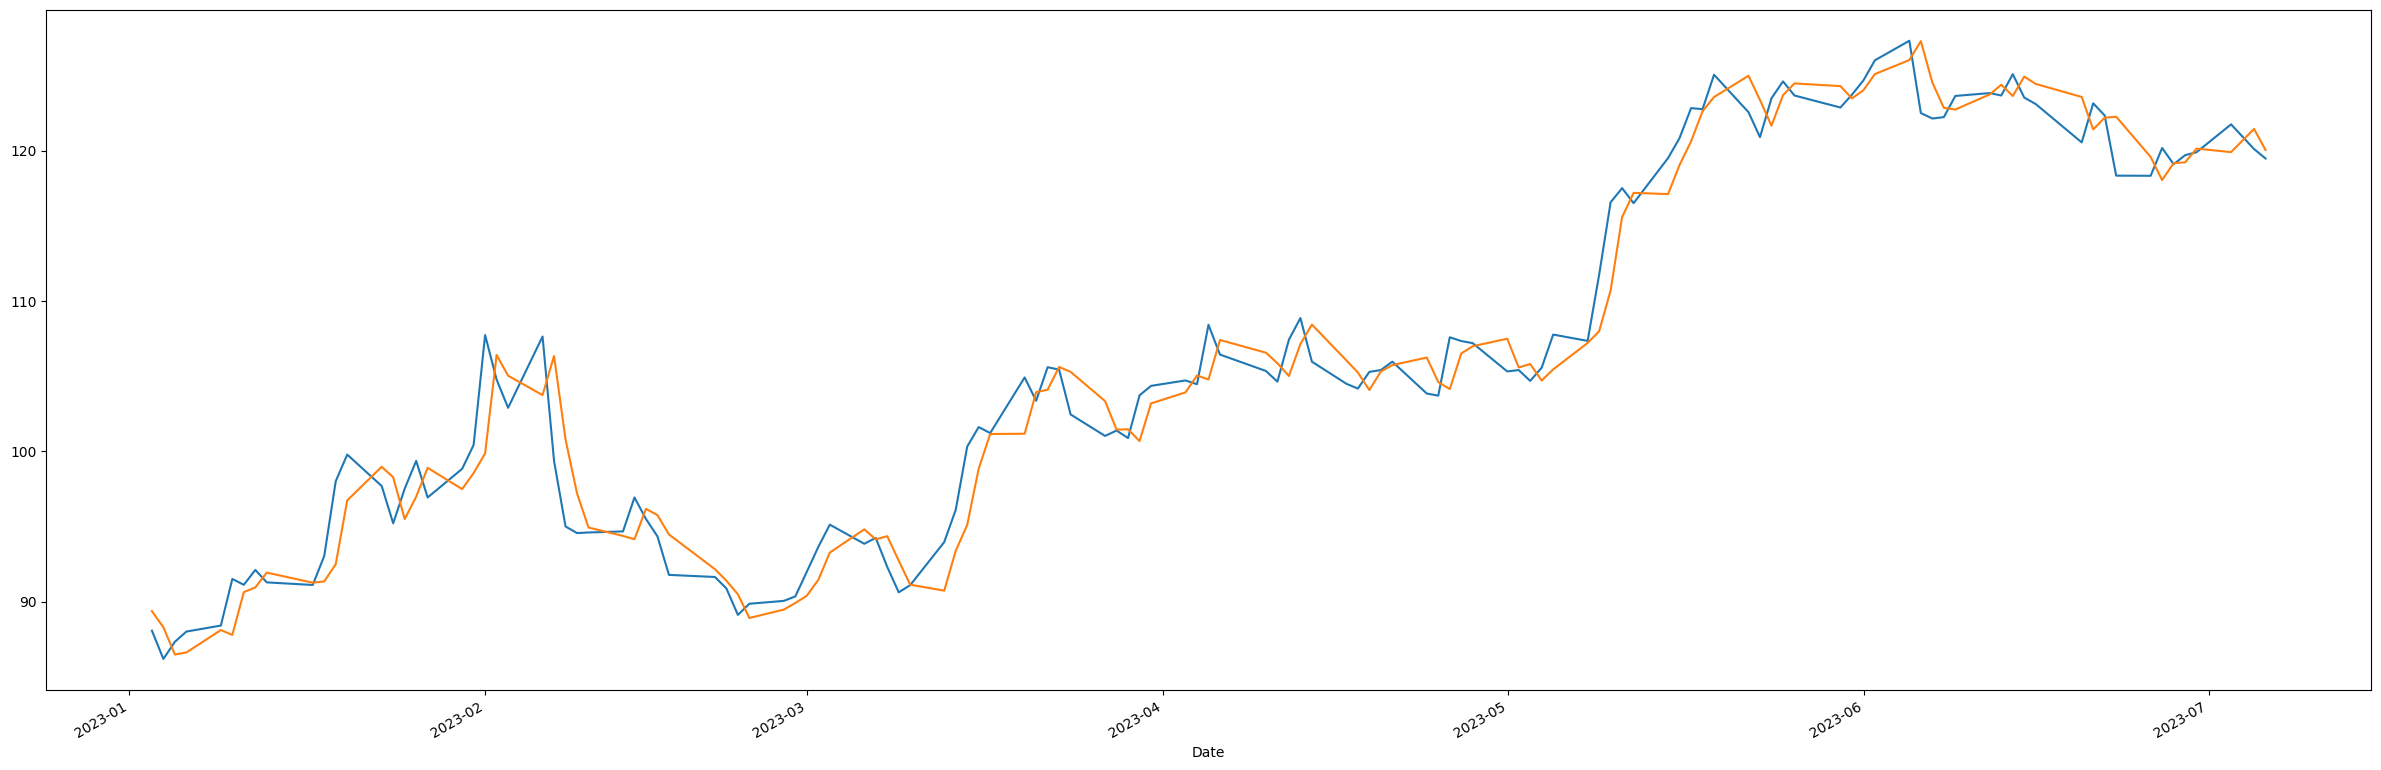

In [21]:
fig, ax = plt.subplots(figsize=(30, 10))
df_plot['Close+1'].plot(ax=ax, label='actual')
df_plot['pred'].plot(ax=ax, label='predict')

